In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [4]:
data = az.from_netcdf("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_chi_cost_test.cdf")
az.summary(data,["logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "ar_chi_std",
                 "ar_chi_tau",
                 "ar_cost_std",
                 "ar_cost_tau",
                 "nEff_inj_per_event",
                 "min_log_neff"])

arviz - WARNING - Shape validation failed: input_shape: (1, 800), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
logR20,-1.661,1.018,-3.478,0.555,0.065,0.052,271.0,201.0,NaN
alpha,-3.767,0.344,-4.398,-3.127,0.021,0.015,267.0,394.0,NaN
mMin,9.102,0.844,7.377,10.660,0.036,0.026,580.0,429.0,NaN
log_dmMin,-0.317,0.333,-0.893,0.272,0.013,0.011,622.0,390.0,NaN
mu_m1,32.863,3.441,25.214,38.247,0.386,0.274,157.0,74.0,NaN
sig_m1,5.032,2.673,2.002,11.043,0.246,0.192,233.0,169.0,NaN
log_f_peak,-2.612,0.264,-3.000,-2.139,0.016,0.012,149.0,49.0,NaN
mMax,76.516,11.005,58.592,98.596,0.370,0.262,751.0,367.0,NaN
log_dmMax,1.030,0.244,0.629,1.477,0.007,0.006,932.0,407.0,NaN
bq,2.377,1.174,0.458,4.682,0.051,0.041,702.0,411.0,NaN


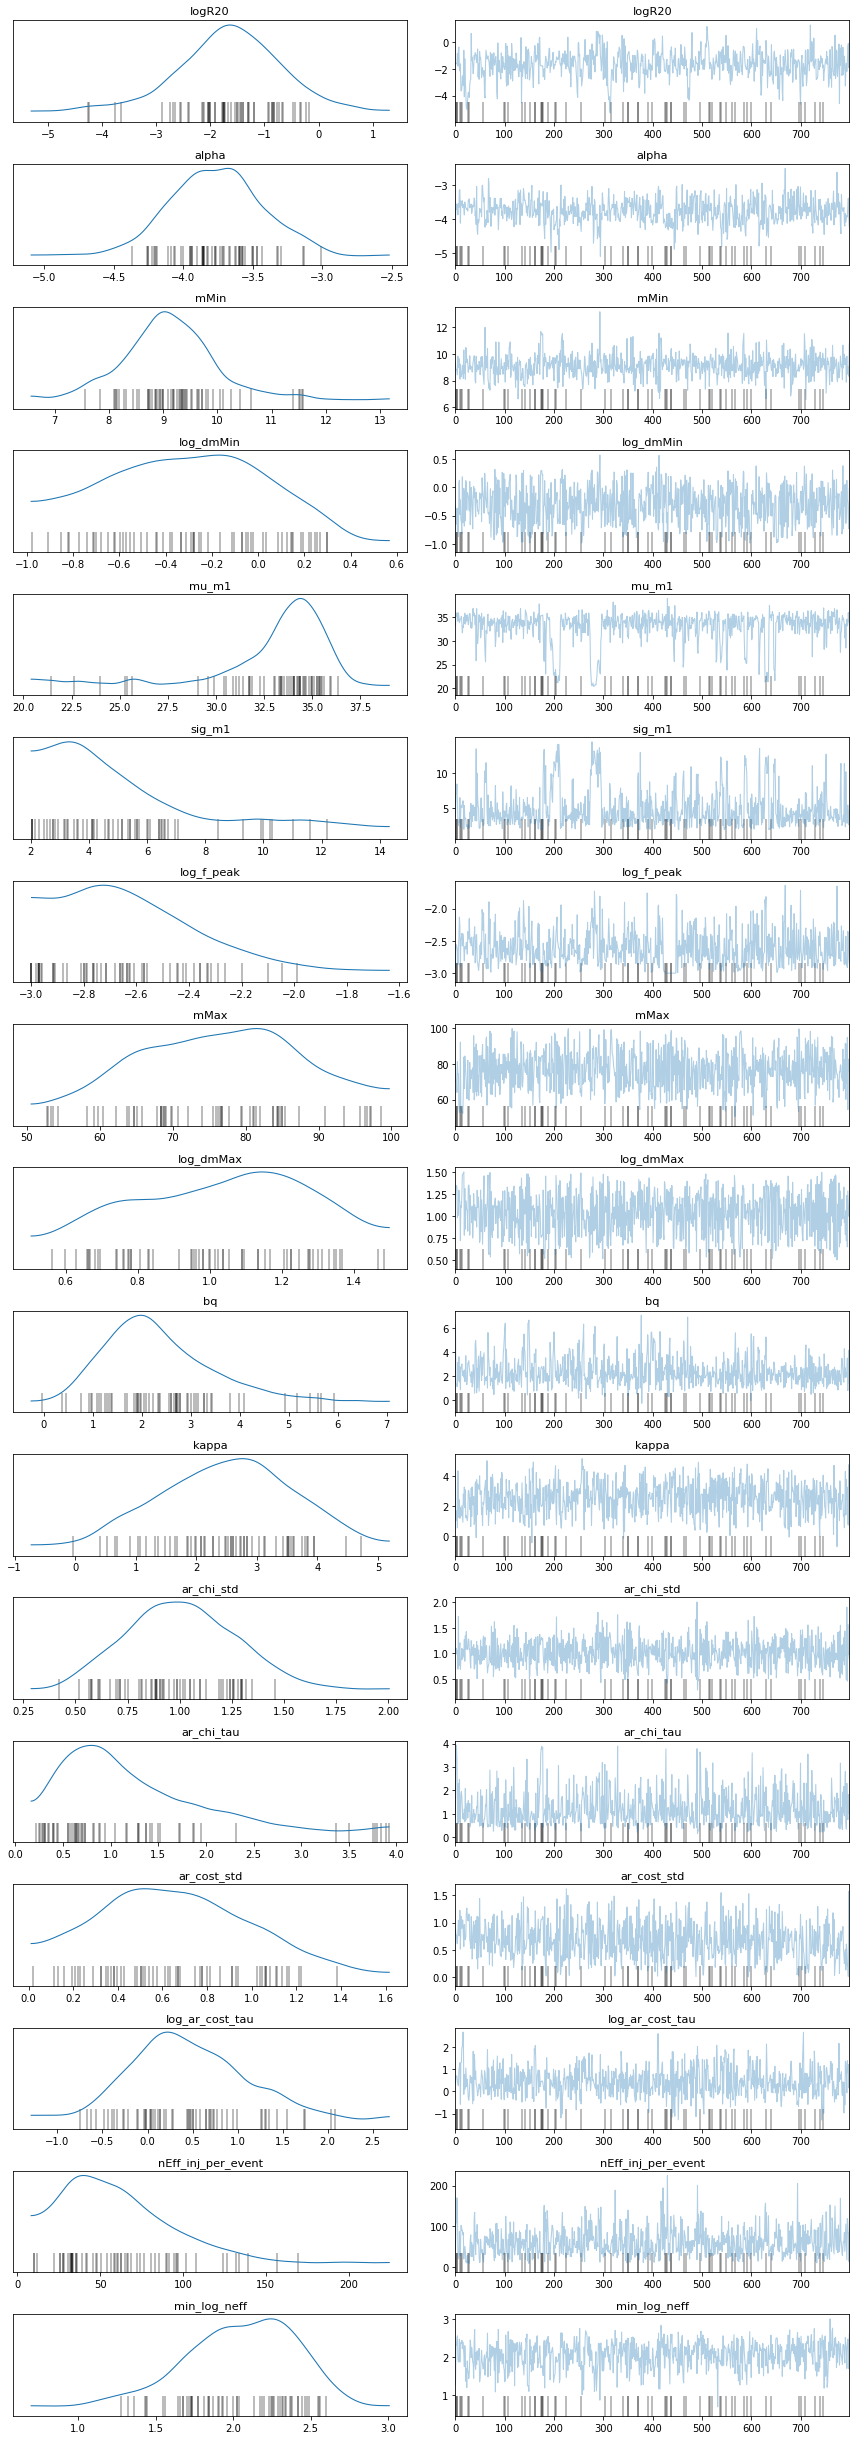

In [6]:
az.plot_trace(data,
              ["logR20",
               "alpha",
               "mMin",
               "log_dmMin",
               "mu_m1",
               "sig_m1",
               "log_f_peak",
               "mMax",
               "log_dmMax",
               "bq",
               "kappa",
               "ar_chi_std",
               "ar_chi_tau",
               "ar_cost_std",
               "log_ar_cost_tau",
               "nEff_inj_per_event","min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [4]:
ar_data = np.load('ar_chi_cost_data.npy',allow_pickle=True)[()]
chi_values = np.exp(ar_data['chi_allSamples'])
cost_values = ar_data['cost_allSamples']

In [5]:
samps = data.posterior.stack(draws=("chain", "draw"))

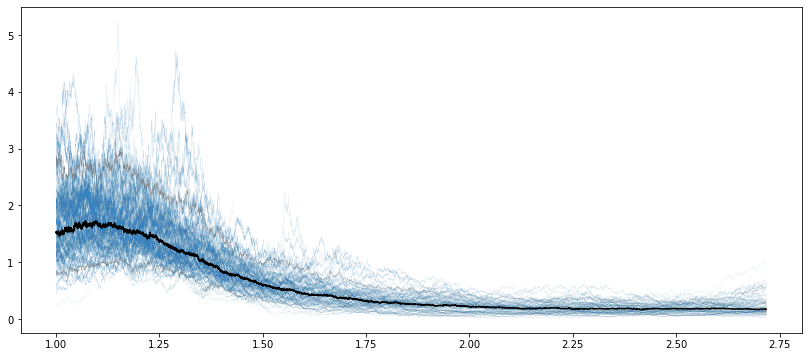

In [6]:
reduced_chis = chi_values[::50]
reduced_f_chis = samps['f_chis'][::50]

p_chis = np.zeros((reduced_chis.size,reduced_f_chis.shape[1]))
for i in range(reduced_f_chis.shape[1]):
    p_chis[:,i] = reduced_f_chis[:,i]
    p_chis[:,i] /= np.trapz(p_chis[:,i],reduced_chis)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_chis.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_chis,p_chis[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_chis,np.median(p_chis,axis=1),color='black')
ax.plot(reduced_chis,np.quantile(p_chis,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_chis,np.quantile(p_chis,0.95,axis=1),color='grey',lw=0.15)

plt.show()

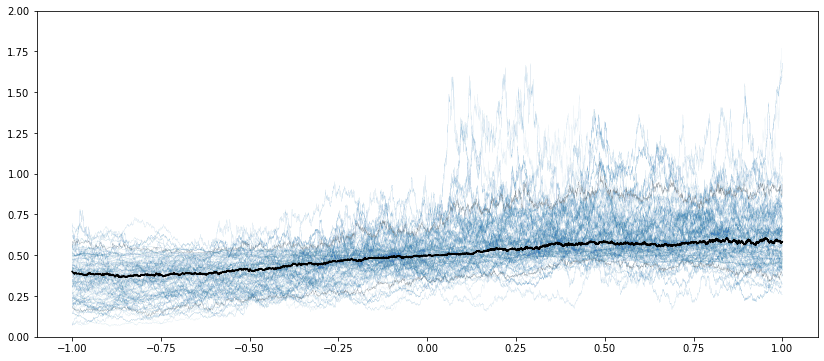

In [7]:
reduced_costs = cost_values[::50]
reduced_f_costs = samps['f_cost'][::50]

p_costs = np.zeros((reduced_costs.size,reduced_f_costs.shape[1]))
for i in range(reduced_f_costs.shape[1]):
    p_costs[:,i] = reduced_f_costs[:,i]
    p_costs[:,i] /= np.trapz(p_costs[:,i],reduced_costs)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_costs.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_costs,p_costs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_costs,np.median(p_costs,axis=1),color='black')
ax.plot(reduced_costs,np.quantile(p_costs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_costs,np.quantile(p_costs,0.95,axis=1),color='grey',lw=0.15)

ax.set_ylim(0,2)

plt.show()

In [9]:
likelihood_data = data.log_likelihood.stack(draws=("chain", "draw"))

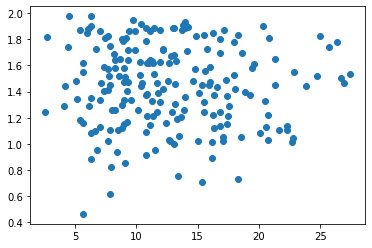

In [10]:
test = (np.max(np.log(samps['f_chis']),axis=0)-np.min(np.log(samps['f_chis']),axis=0))**2
#plt.scatter(test,likelihood_data['chi_elastic'])
plt.scatter(test,samps['ar_chi_tau'])